# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*


## Exercise: Regularized Polynomial Regression 


Tasks: 

1. Develop Loss function with $l2$ regularization term for linear and polynomial regression;  

2. Run linear regression, plot the resulting model and learning curve (training and testing error agains the number of samples); 

3. Run polynomial regression (degree = 5), plot the resulting model, and the learning curve; 

4. Regularized the model with lambda = 2, plot the resulting model, and the learning curve; 

5. Regularized the model with lambda = 100, plot the resulting model, and the learning curve; 

6. Discuss the effect of regularization. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

# optimization procedure (GD)
from scipy.optimize import minimize 

In [3]:
# initially v. 1.8.0
# now 1.12.0 
# ntb 1.10.1
import scipy
print(scipy.__version__)

1.10.1


### Data

In [4]:
data = loadmat('./ex7data.mat')
X_train = np.c_[np.ones_like(data['X']), data['X']]
y_train = data['y']

X_test = np.c_[np.ones_like(data['Xval']), data['Xval']]
y_test = data['yval']

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (12, 2)
y_train: (12, 1)
X_test: (21, 2)
y_test: (21, 1)


### Plot the input data


Text(0, 0.5, 'Water flowing out of the dam (y)')

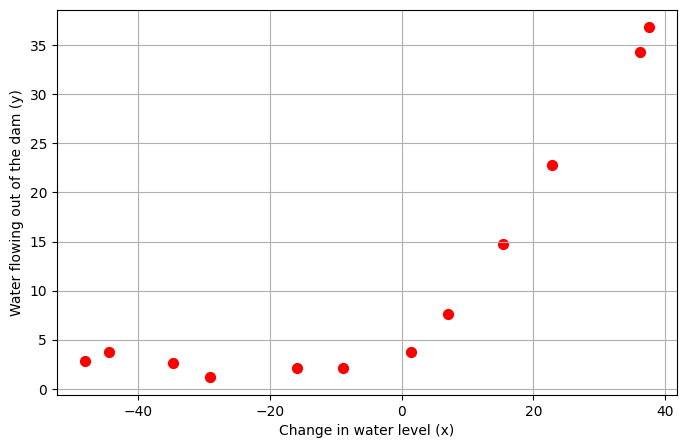

In [5]:
# Plot input data 
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'o', linewidths = 1, label = 'Data')
plt.grid(True)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

### Note: 
The data are definitely not linear, but let's define the linear regression loss function with a second term, the regularization term that controls overfitting and underfitting. A higher $\lambda$ value means smaller parameter ($\theta$) values (danger of underfitting) and vice versa (danger of overfitting).

### Regularized Linear Regression Loss Function

$$J(\theta) = \frac{1}{2m} \Big(\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2\Big) + \frac{\lambda}{2m}\Big(\sum_{j=1}^n \theta_j^2\Big)$$

where $h_\theta(x)$ is the linear model defined by:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +  \theta_n x_n $$

where $m$ is the number of training examples, $n$ is the number of parameters, and $\theta_0$ is the bias term which goes unregularized.

In order to minimize this loss function, we also need to calculate the partial derivatives of $J$ with respect to each $\theta_{j}$.

### Linear Regression Partial Derivatives
$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} \Big( h_\theta (x^{(i)})-y^{(i)}\Big)x^{(i)}_{j} $      for $ j = 0 $

$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \Big(\frac{1}{m}\sum_{i=1}^{m}  ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}\Big) + \frac{\lambda}{m}\theta_j$ for $ j \geq1 $

These definitions are different because we do not regularize $\theta_0$, the bias term.


### Task 1. Develop Loss function with $l2$ regularization term

In [6]:
m = y_train.size
m

12

In [7]:
initial_theta = np.ones(X_train.shape[1])

In [9]:
h = np.dot(X_train,initial_theta).reshape((m, 1))
h.shape

(12, 1)

In [10]:
J = (1 / (2 * m)) * np.sum(np.square(h - y_train))
J

303.9515255535976

In [11]:
reg = 1
J_reg = (reg / (2 * m)) * initial_theta[1:].T.dot(initial_theta[1:])
J_reg

0.041666666666666664

In [12]:
# Define loss function taking into account the regularization term initialized to 0 
# J_total = J + J_reg 

def loss(theta, X, y, reg=0):
    """Loss function to calculate model loss and gradients with regularization 
    """
    m = y.size
    h = np.dot(X,theta).reshape((m, 1))
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    J_reg = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J_total = J + J_reg
    # gradients (extra output) 
    # grad = ((1 / m)*(X.T.dot(h - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()
    
    return J_total

Let's  initialize theta as a vector of ones with a dimensionality equal to the number of columns in our matrix $X$. Then we can just pass the function these variables and see what it outputs.

In [13]:
initial_theta = np.ones((X_train.shape[1], 1))
initial_theta

array([[1.],
       [1.]])

In [14]:
# Test the losss() function with some data 
initial_theta = np.ones((X_train.shape[1], 1))
# initial_grad
initial_loss  = loss(initial_theta, X_train, y_train)
print("Initial loss: {0}".format(initial_loss))

Initial loss: [[303.95152555]]


Now, we optimize our parameter values using the scipy function `minimize()`, taking as parameters: 

`fun = loss` .. loss function, as defined 

`x0 = theta` .. initial values of model parmeters theta 

`args = (X, y, reg)` inputs 

`jac = True` .. jac : bool or callable, optional Jacobian (gradient) of objective function. 

In [15]:
# Define optimization procedure using scipy minimize()
# Return optimal theta 

#  jac = True  REMOVED

def optimalTheta(theta, X, y, reg = 0):
    res = minimize(fun = loss, x0 = theta, args = (X, y, reg))
    
    return res.x

### Task 2. Run linear regression 


In [16]:
# Define the model 
def model(X, theta): 
    m = X.shape[0]
    return np.dot(X,theta).reshape((m, 1))

In [17]:
initial_theta = np.ones(X_train.shape[1])
initial_theta.shape

(2,)

In [18]:
# Find the optimal paramters 
# initial_theta = np.ones((X_train.shape[1], 1))
initial_theta = np.ones(X_train.shape[1])
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))

Optimized theta: [13.08790369  0.36777922]


#### Plot the model and data

In [19]:
# Prepare model data for plot 
X_lin = np.linspace(-50, 50, 100)
X_plot = np.c_[np.ones_like(X_lin), X_lin] 
X_plot.shape
y_plot = model(X_plot, opt_theta.reshape(-1, 1))

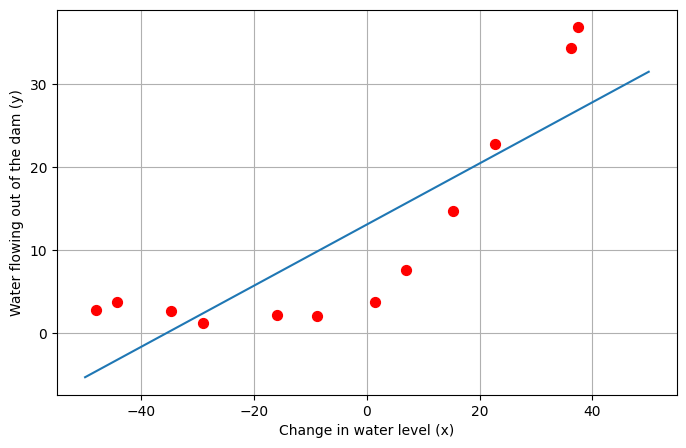

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'o', linewidths = 1, label = 'Data')
plt.grid(True)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
# model
plt.plot(X_plot[:, 1], y_plot)

#### Plot the learning curve

Let's compare our model’s training error with the validation error. These error values are the numbers output by our loss function relative to both datasets. One way to diagnose bias and variance errors is to plot the error relative to the training set and the validation data set. 

In [25]:
# Define function to get training and testing error against the increasing number of training data 
# from 1 to range of y.size 

def learning_curve(X_train, y_train, initial_theta):

    error_train = [] 
    error_test = [] 
    m = y_train.size 

    theta = initial_theta
    for i in range(m): 
        opt_theta = optimalTheta(theta, X_train[:i + 1], y_train[:i + 1])
        error_train.append(loss(opt_theta, X_train[:i + 1], y_train[:i + 1])) #[0])
        error_test.append(loss(opt_theta, X_test, y_test)) # [0]
    
    return error_train, error_test

In [26]:
error_train, error_test = learning_curve(X_train, y_train, initial_theta)

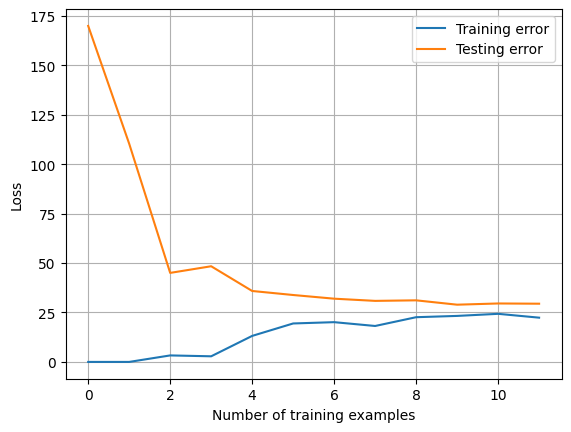

In [27]:
plt.plot(range(m), error_train, label='Training error')
plt.plot(range(m), error_test, label='Testing error')
plt.grid(True)
plt.xlabel('Number of training examples')
plt.ylabel('Loss')
plt.legend()

Our error is high when the number of training examples increases, which is the exact opposite of what we should expect to see. This is definitely a high bias problem. Linear regression is just too simple to fit this dataset.

### Task 3. Run polynomial regression

Addressing a simple linear model means adding more features which are no longer linear, but are instead the features being raised to higher powers. Explicitly, we will redefine $h$ as

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 * (waterLevel) + \theta_2 * (waterLevel)^2 + ... +  \theta_p * (waterLevel)^p $$
$$ = \theta_0 + \theta_1 x_1 + \theta_2 x_2^2 + ... +  \theta_n x_n^p $$

... we are  squaring, cubing, etc the columns of our $X$ matrix and then multiplying these new features by new parameters $\theta$ and adding all that together. This is called feature mapping -- we are mapping the old features to a higher dimension. Let's code it up! We will also code up feature normalization, which is defined as

$$ X_{norm} = \frac{(X - \mu)}{\sigma} $$

where $\mu$ is the mean and $\sigma$ is the standard deviation. We do feature normalization because after feature mapping, the values need to be rescaled.


In [422]:
def polyFeatures(X, p):
    """Function to transform input features X into 
       polynomial of defiend degree and  normalize the features! 
       Returns both, original X and the transformed normalizaed X_norm
    """
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)
    
    X_norm = X
    # Column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    
    return X, X_norm    

Now we need to fit theta to our new higher dimensional $X$ matrix and plot the fit. 

### Fit polynomial

In [423]:
degree = 5

In [424]:
# Prepare polynomial X 
X_poly = polyFeatures(X, degree)[1]
# Initialize theta 
initial_theta = np.ones((X_poly.shape[1], 1))
# Optimize 
opt_theta = optimalTheta(initial_theta, X_poly, y_train)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_29213/535422185.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac = True)


#### Plot data and the resulting model

In [427]:
# Prepare data for plot (linear data X from -50 to 50)
num_points = 1000
X_lin = np.linspace(-50, 50, num_points)
X_plot = np.c_[np.ones_like(X_lin), X_lin] 
X_plot = polyFeatures(X_plot, len(opt_theta)-2)[0]
y_plot = model(X_plot, opt_theta.reshape(-1, 1))

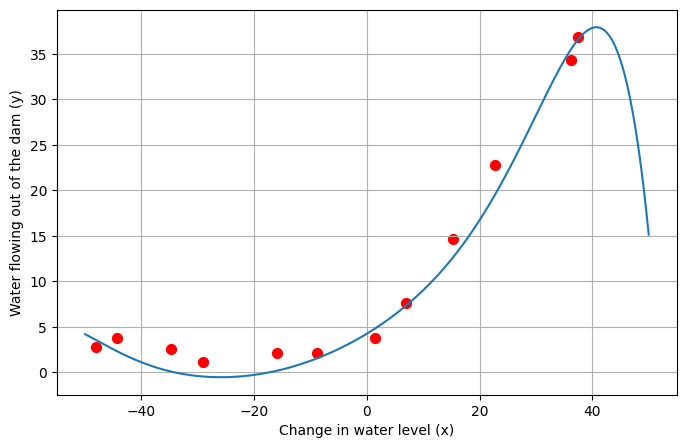

In [428]:
# Plot 
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'o', linewidths = 1, label = 'Data')
plt.grid(True)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
# model
plt.plot(X_lin, y_plot)

There is definitely low training error, however, this fit is far too complex. The model is overfited (high variance), so we now have the opposite problem. Let's plot the new learning curve.

#### Plot the learning curve

In [438]:
# Prepare polynomial X_train and X_test
X_poly_train = polyFeatures(X_train, degree)[1]
X_poly_test = polyFeatures(X_test,  degree)[1]

In [439]:
# Define function to get training and testing error against the increasing number of training data 
# from 1 to range of y.size 
# update the initial theta 

initial_theta = np.ones((X_poly_train.shape[1], 1))

def learning_curve(X_train, y_train, X_test, y_test, initial_theta):

    error_train = [] 
    error_test = [] 
    m = y_train.size 

    theta = initial_theta
    for i in range(m): 
        opt_theta = optimalTheta(theta, X_train[:i + 1], y_train[:i + 1])
        error_train.append(loss(opt_theta, X_train[:i + 1], y_train[:i + 1])[0])
        error_test.append(loss(opt_theta, X_test, y_test)[0])
    
    return error_train, error_test

In [440]:
# run the function 
error_train, error_test = learning_curve(X_poly_train, y_train, X_poly_test, y_test, initial_theta)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_29213/535422185.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac = True)


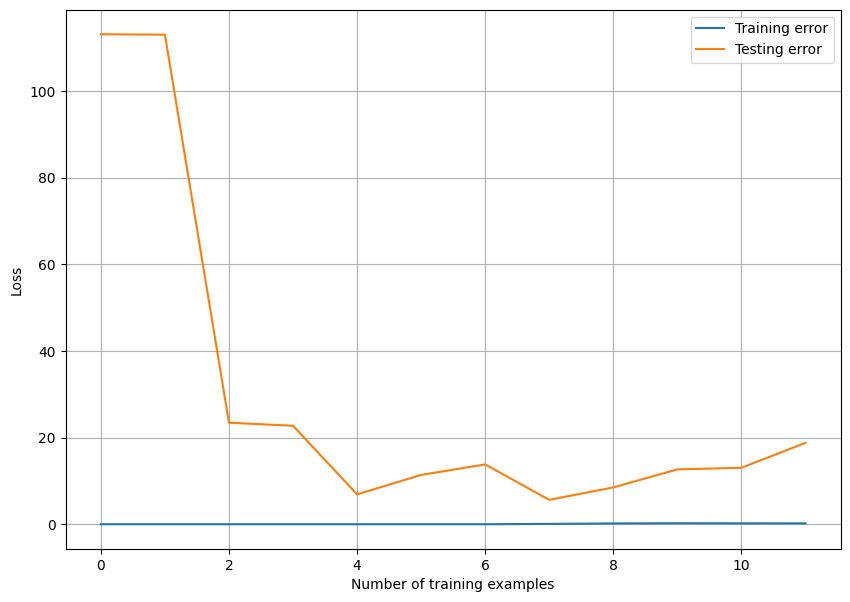

In [441]:
# Plot result
plt.plot(range(m), error_train, label='Training error')
plt.plot(range(m), error_test, label='Testing error')
plt.grid(True)
plt.xlabel('Number of training examples')
plt.ylabel('Loss')
plt.legend()

The training error is basically zero, but it would also be nice if the validation error was also low. The model does not generalize well to data that were not used to optimize its parameter values. 

### Task 4. Regularized the model 

and adjust regularizing parameter $\lambda$

Try using a $\lambda$-value of $2$ and see what happens to our polynomial regression fit and the learning curves.

In [442]:
# Optimize the theta with reg = 2 

# initialize theta 
initial_theta = np.ones((X_poly_train.shape[1], 1))
# optimize 
opt_theta = optimalTheta(initial_theta, X_poly_train, y_train, reg=2)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_29213/535422185.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac = True)


In [443]:
# Prepare model data for plot 
num_points = 1000
X_lin = np.linspace(-50, 50, num_points)
X_plot = np.c_[np.ones_like(X_lin), X_lin] 
X_plot = polyFeatures(X_plot, len(opt_theta)-2)[0]
y_plot = model(X_plot, opt_theta.reshape(-1, 1))

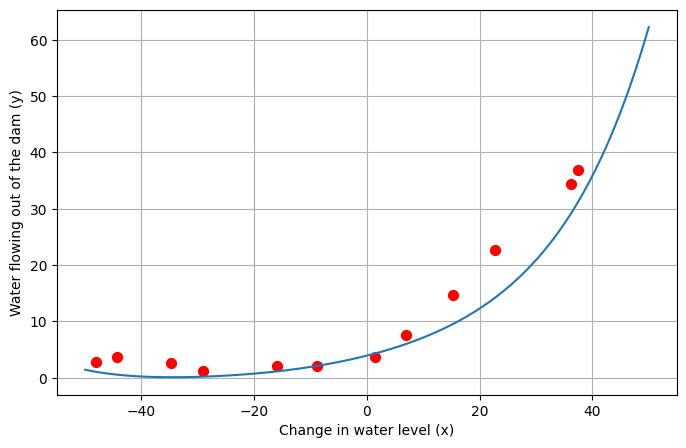

In [444]:
# Plot 
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'o', linewidths = 1, label = 'Data')
plt.grid(True)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
# model
plt.plot(X_lin, y_plot)

#### Plot the learning curve

In [445]:
# Udated learning curve function with reg parameter 

def learning_curve(X_train, y_train, X_test, y_test, initial_theta, reg):

    error_train = [] 
    error_test = [] 
    m = y_train.size 

    theta = initial_theta
    for i in range(m): 
        opt_theta = optimalTheta(theta, X_train[:i + 1], y_train[:i + 1], reg)
        error_train.append(loss(opt_theta, X_train[:i + 1], y_train[:i + 1])[0])
        error_test.append(loss(opt_theta, X_test, y_test)[0])
    
    return error_train, error_test

In [446]:
# run the function to get the data 
reg = 2
error_train, error_test = learning_curve(X_poly_train, y_train, X_poly_test, y_test, initial_theta, reg)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_29213/535422185.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac = True)


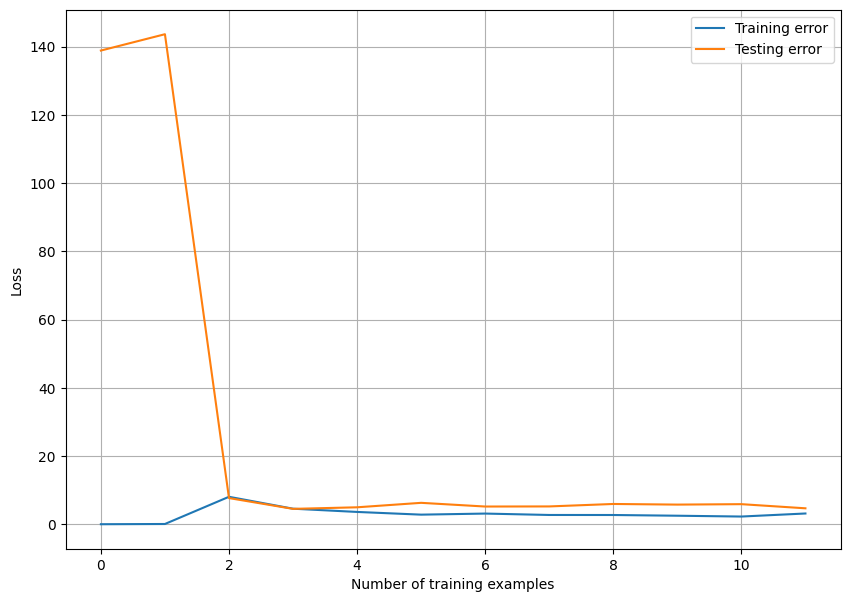

In [448]:
# Plot
plt.plot(range(m), error_train, label='Training error')
plt.plot(range(m), error_test, label='Testing error')
plt.grid(True)
plt.xlabel('Number of training examples')
plt.ylabel('Loss')
plt.legend()

As the above plots show, we no longer fit the training set perfectly, however, our cross-validation error has significantly decreased to the point where it is almost the same as our training error. This is encouraging and an indicator of a model that can generalize well.


### Task 5. Regularized the model with high lambda

What happens if we set $\lambda$ up to something  high, $100$ for example?

In [449]:
# initialize the theta 
initial_theta = np.ones((X_poly_train.shape[1], 1))
# optimize 
opt_theta = optimalTheta(initial_theta, X_poly_train, y_train, reg=100)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_29213/535422185.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac = True)


In [450]:
# Prepare model data for plot 
num_points = 1000
X_lin = np.linspace(-50, 50, num_points)
X_plot = np.c_[np.ones_like(X_lin), X_lin] 
X_plot = polyFeatures(X_plot, len(opt_theta)-2)[0]
y_plot = model(X_plot, opt_theta.reshape(-1, 1))

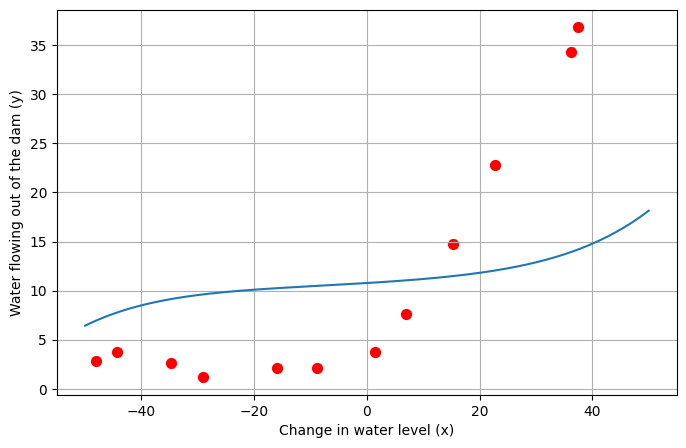

In [451]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'o', linewidths = 1, label = 'Data')
plt.grid(True)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
# model
plt.plot(X_lin, y_plot)

#### Plot the learning curve

In [452]:
# prepare the data
reg = 100
error_train, error_test = learning_curve(X_poly_train, y_train, X_poly_test, y_test, initial_theta, reg)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_29213/535422185.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac = True)


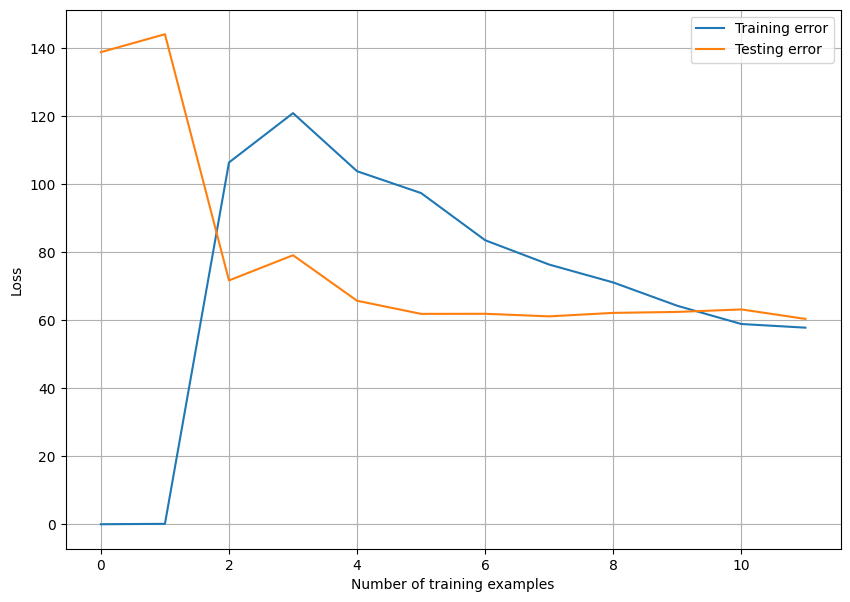

In [453]:
# Plot
plt.plot(range(m), error_train, label='Training error')
plt.plot(range(m), error_test, label='Testing error')
plt.grid(True)
plt.xlabel('Number of training examples')
plt.ylabel('Loss')
plt.legend()

Now we're back to the problem we had with our linear model; the model is underfit! When $\lambda$ is too high, the values of $\theta$ are pushed too close to zero and cannot fit the data well. As such, we do poorly on both the training and cross-validation data. Playing with the value of $\lambda$ to find the best fit is the eternal struggle of machine learning, even in neural networks!


### 6. Discuss the effect of regularization